In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#scikit-learn library: preproccessing data and K-means
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import confusion_matrix,silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Set up the visualization style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

**1: Loading Dataset using Pandas:**

In [65]:
# at first we should clean our dataset and make it a clean Dataframe
df = pd.read_csv('dataset.csv',sep=';')
df.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,"7,4","0,7",0,"1,9","0,076",11,34,"0,9978","3,51","0,56","9,4"
1,1,"7,8","0,88",0,"2,6","0,098",25,67,"0,9968","3,2","0,68","9,8"
2,2,"7,8","0,76","0,04","2,3","0,092",15,54,"0,997","3,26","0,65","9,8"
3,3,"11,2","0,28","0,56","1,9","0,075",17,60,"0,998","3,16","0,58","9,8"
4,4,"7,4","0,7",0,"1,9","0,076",11,34,"0,9978","3,51","0,56","9,4"
5,5,"7,4","0,66",0,"1,8","0,075",13,40,"0,9978","3,51","0,56","9,4"
6,6,"7,9","0,6","0,06","1,6","0,069",15,59,"0,9964","3,3","0,46","9,4"
7,7,"7,3","0,65",0,"1,2","0,065",15,21,"0,9946","3,39","0,47",10
8,8,"7,8","0,58","0,02",2,"0,073",9,18,"0,9968","3,36","0,57","9,5"
9,10,"6,7","0,58","0,08","1,8","0,097",15,65,"0,9959","3,28","0,54","9,2"


In [66]:
#we set Id  as index to maintain unique identifier for each wine sample:
df = df.set_index(df['Id'])
df = df.drop(columns =['Id'])
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,"7,4","0,7",0,"1,9","0,076",11,34,"0,9978","3,51","0,56","9,4"
1,"7,8","0,88",0,"2,6","0,098",25,67,"0,9968","3,2","0,68","9,8"
2,"7,8","0,76","0,04","2,3","0,092",15,54,"0,997","3,26","0,65","9,8"
3,"11,2","0,28","0,56","1,9","0,075",17,60,"0,998","3,16","0,58","9,8"
4,"7,4","0,7",0,"1,9","0,076",11,34,"0,9978","3,51","0,56","9,4"
5,"7,4","0,66",0,"1,8","0,075",13,40,"0,9978","3,51","0,56","9,4"
6,"7,9","0,6","0,06","1,6","0,069",15,59,"0,9964","3,3","0,46","9,4"
7,"7,3","0,65",0,"1,2","0,065",15,21,"0,9946","3,39","0,47",10
8,"7,8","0,58","0,02",2,"0,073",9,18,"0,9968","3,36","0,57","9,5"


In [67]:
#check out the shape of our dataset
df.shape

(1143, 11)

In [68]:
#printing last 5 rows of our df
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
1592,"6,3","0,51","0,13","2,3","0,076",29,40,"0,99574","3,42","0,75",11
1593,"6,8","0,62","0,08","1,9","0,068",28,38,"0,99651","3,42","0,82","9,5"
1594,"6,2","0,6","0,08",2,"0,09",32,44,"0,9949","3,45","0,58","10,5"
1595,"5,9","0,55","0,1","2,2","0,062",39,51,"0,99512","3,52","0,76","11,2"
1597,"5,9","0,645","0,12",2,"0,075",32,44,"0,99547","3,57","0,71","10,2"


In [69]:
# as we can see there is still a problem with our df representaion which is showing float values like string,
# to handle this situation we use replace() method to replace ',' with '.'
df = df.replace(',', '.', regex=True).astype(float)

df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [70]:
#printing informations about our df using info() method:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
dtypes: float64(11)
memory usage: 107.2 KB


In [52]:
#presenting some basic statistical details like percentile,mean, std, etc
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [53]:
#checking for missing values:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

as we check there is no missing value, but in a case where there is some, we need to consider it with some rule of thumb, if there was a small number of missing value for a column, we drop rows that are null, but if its too much we shoulf get rid of that column because it could not help to make a better classification

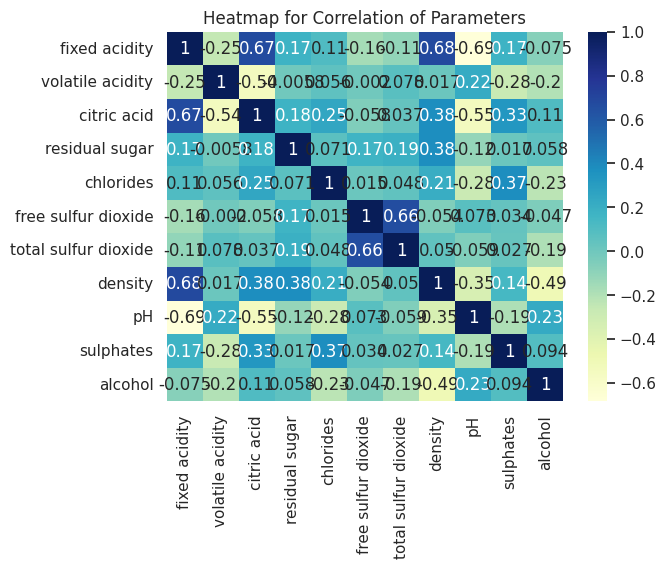

In [71]:
#visualizing heatmap corrolation between parameters:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.title('Heatmap for Correlation of Parameters')
plt.show()

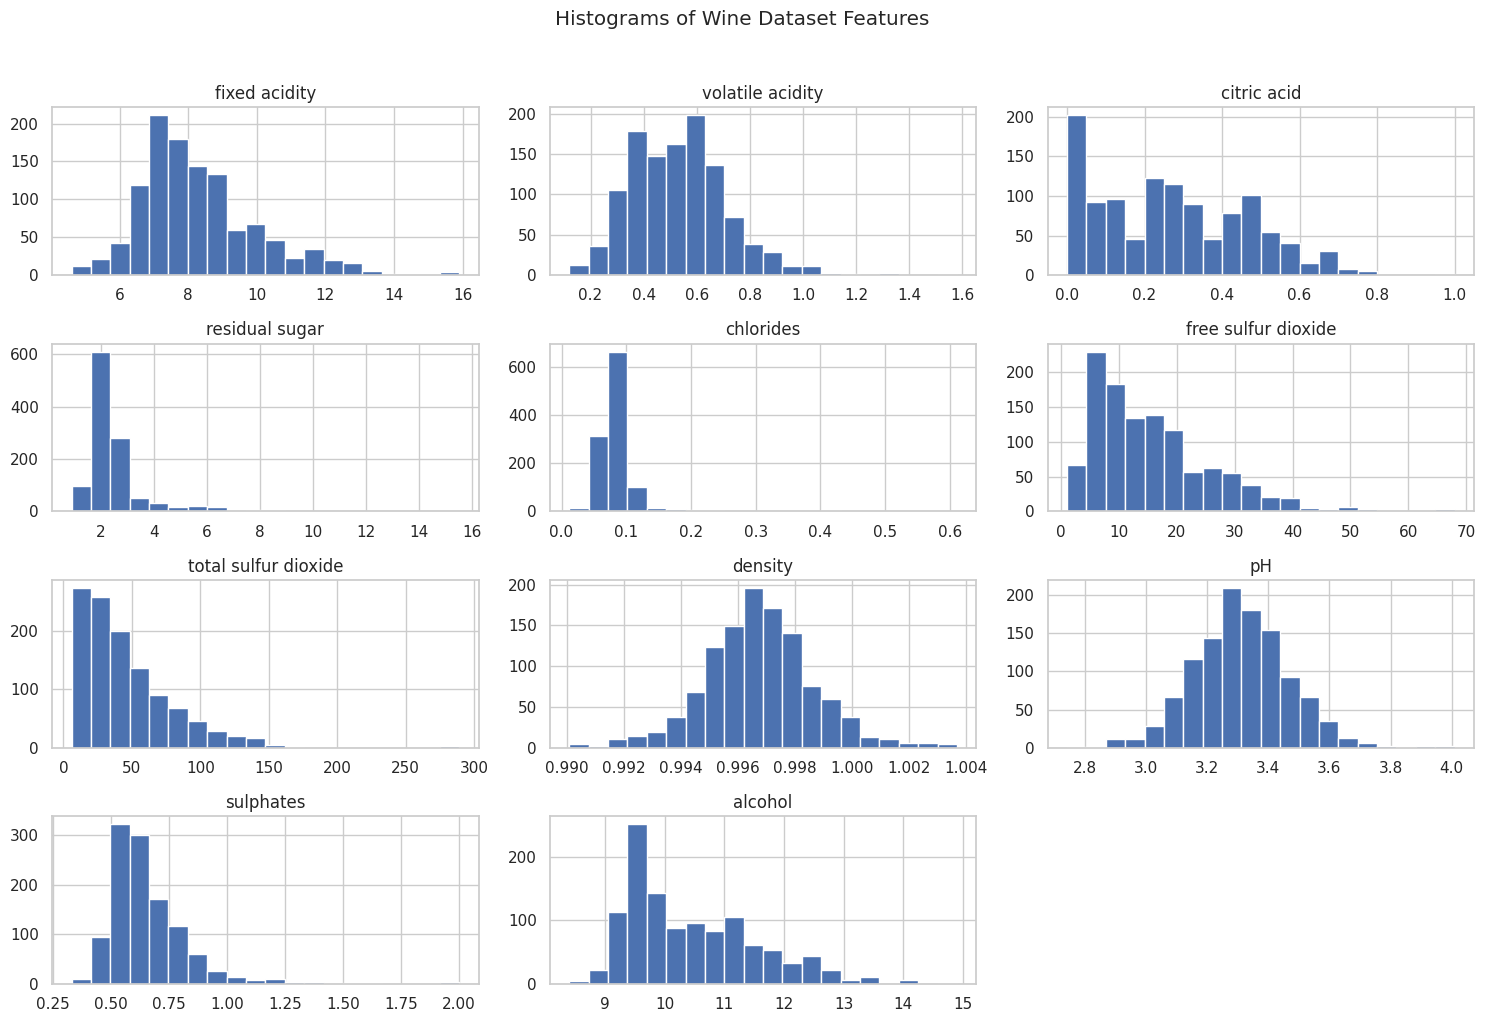

In [72]:
#histogram plot to indicate the disterbution of individual features in dataset
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Wine Dataset Features", y=1.02)
plt.tight_layout()
plt.show()


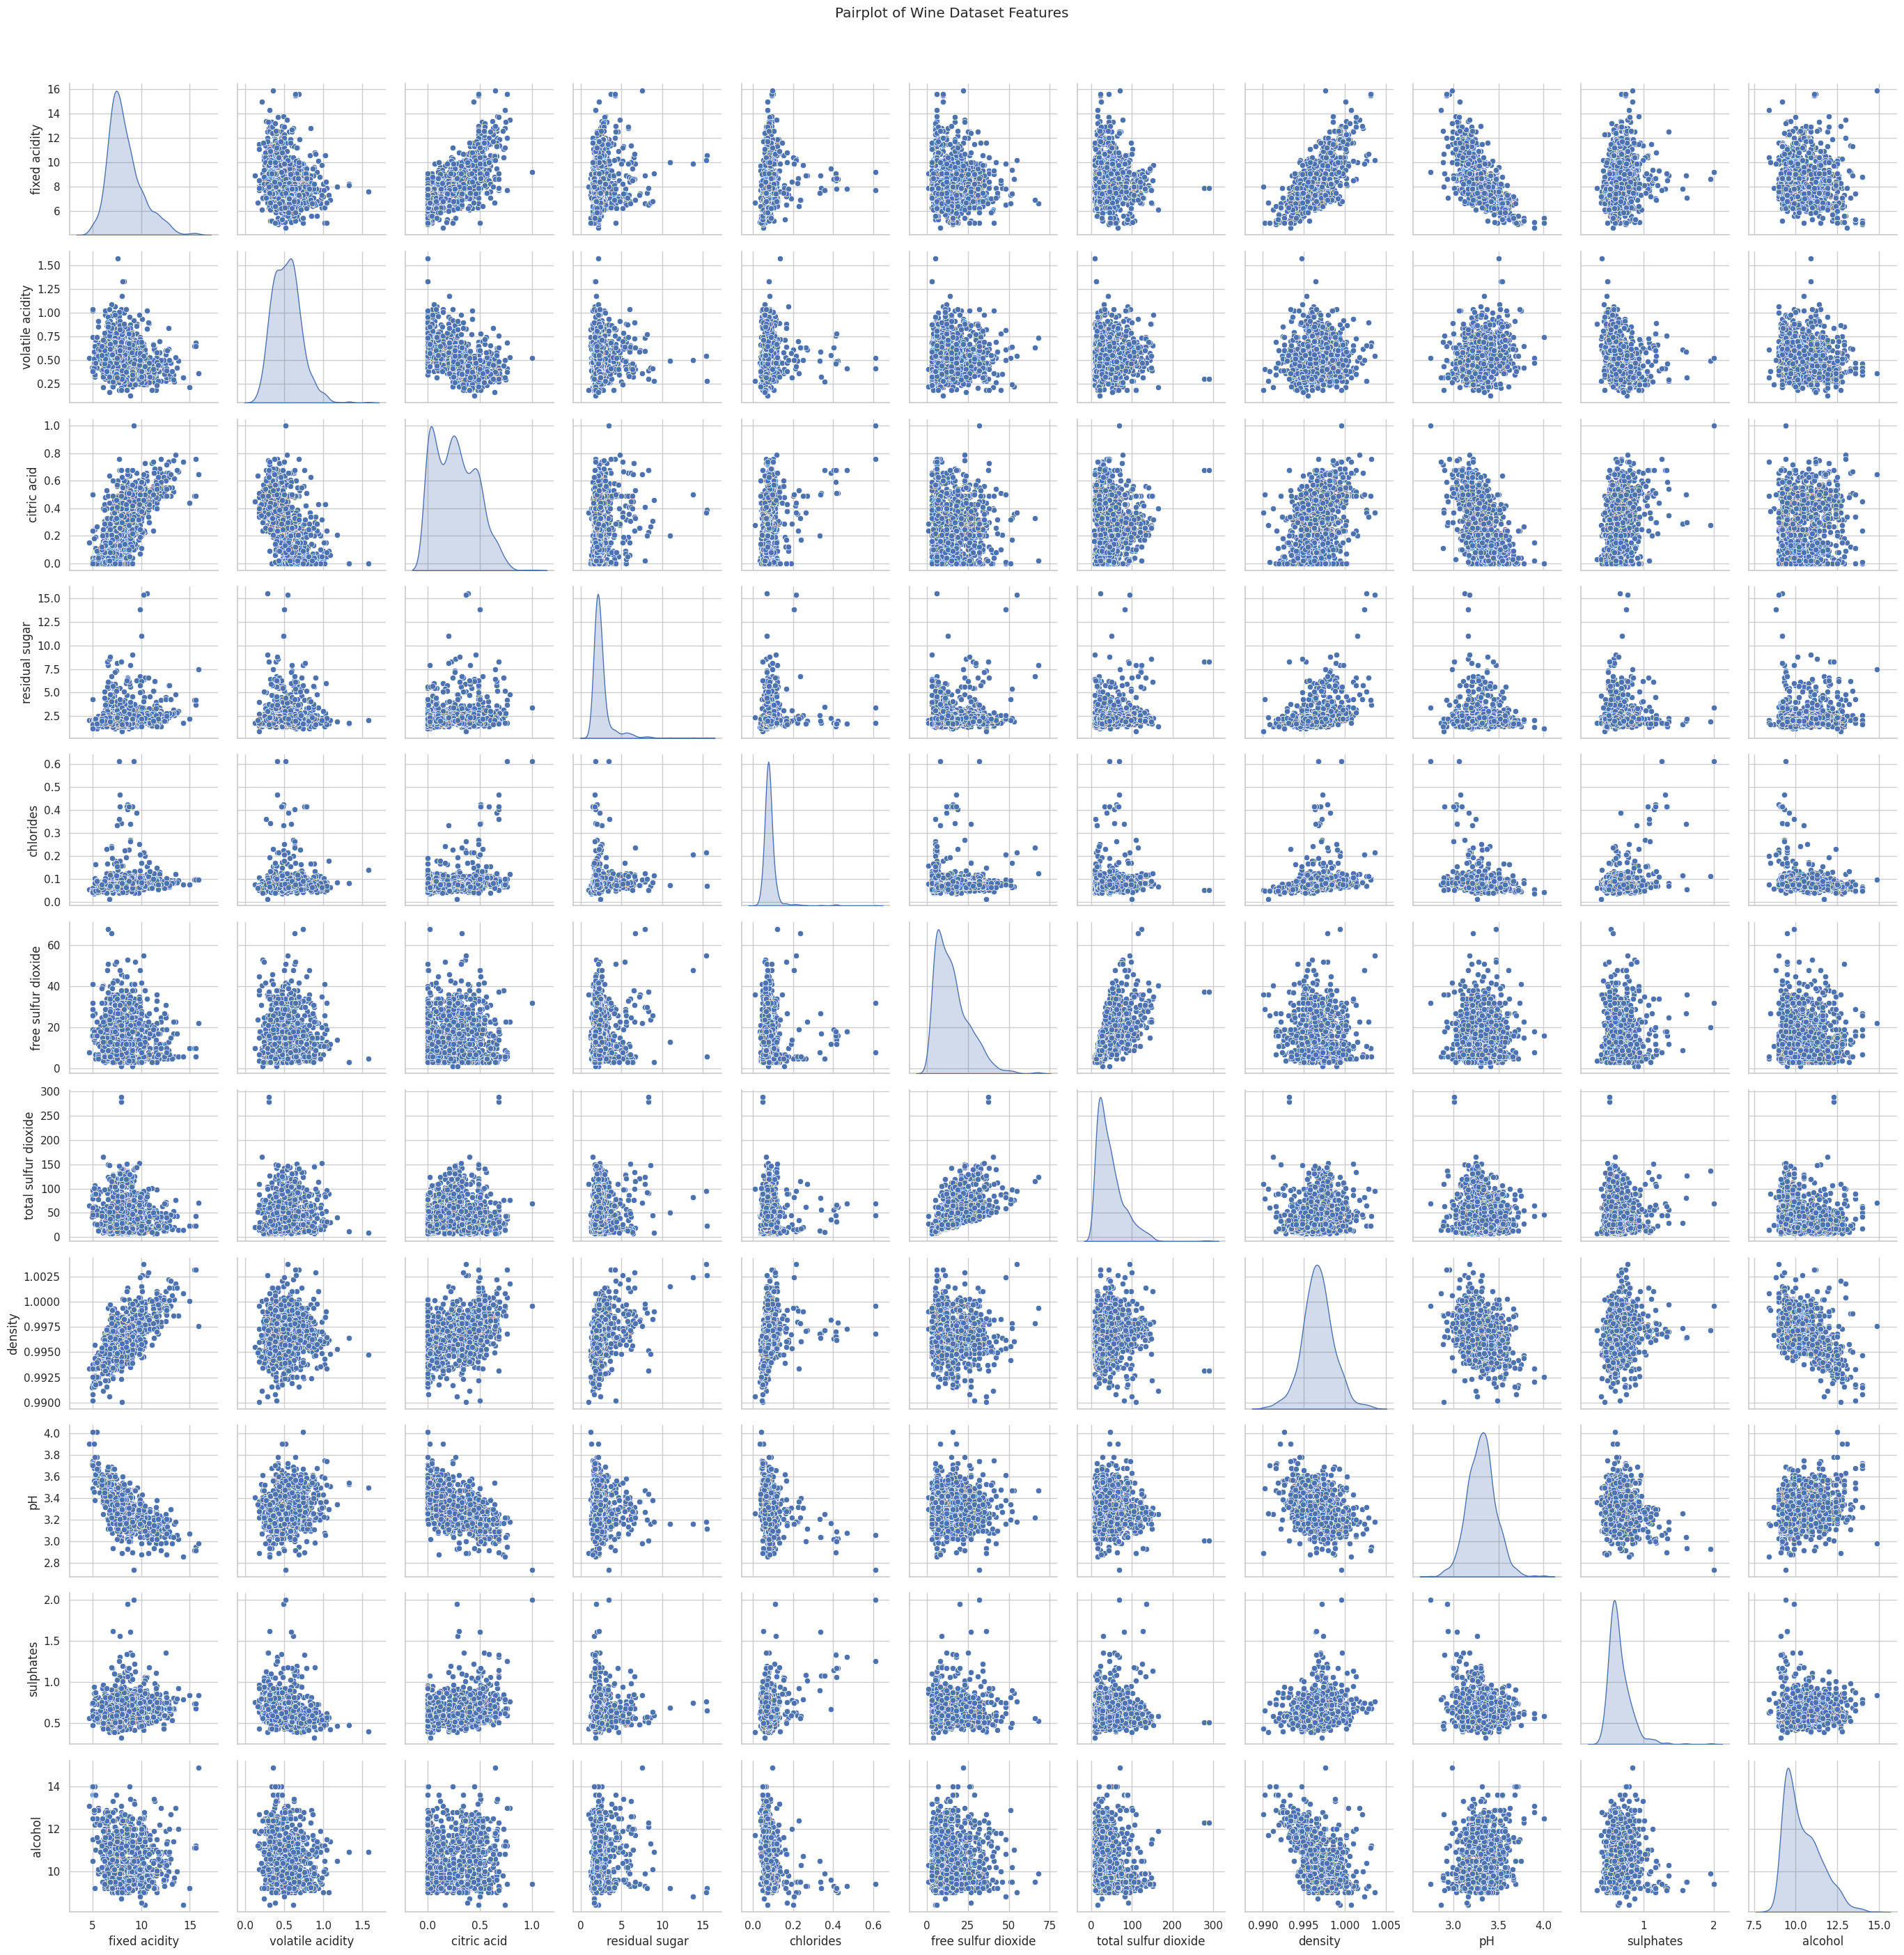

In [73]:
# Pairplot is used for exploring pairwise relationships between multiple features in dataset.
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Wine Dataset Features", y=1.02)
plt.tight_layout()
plt.show()

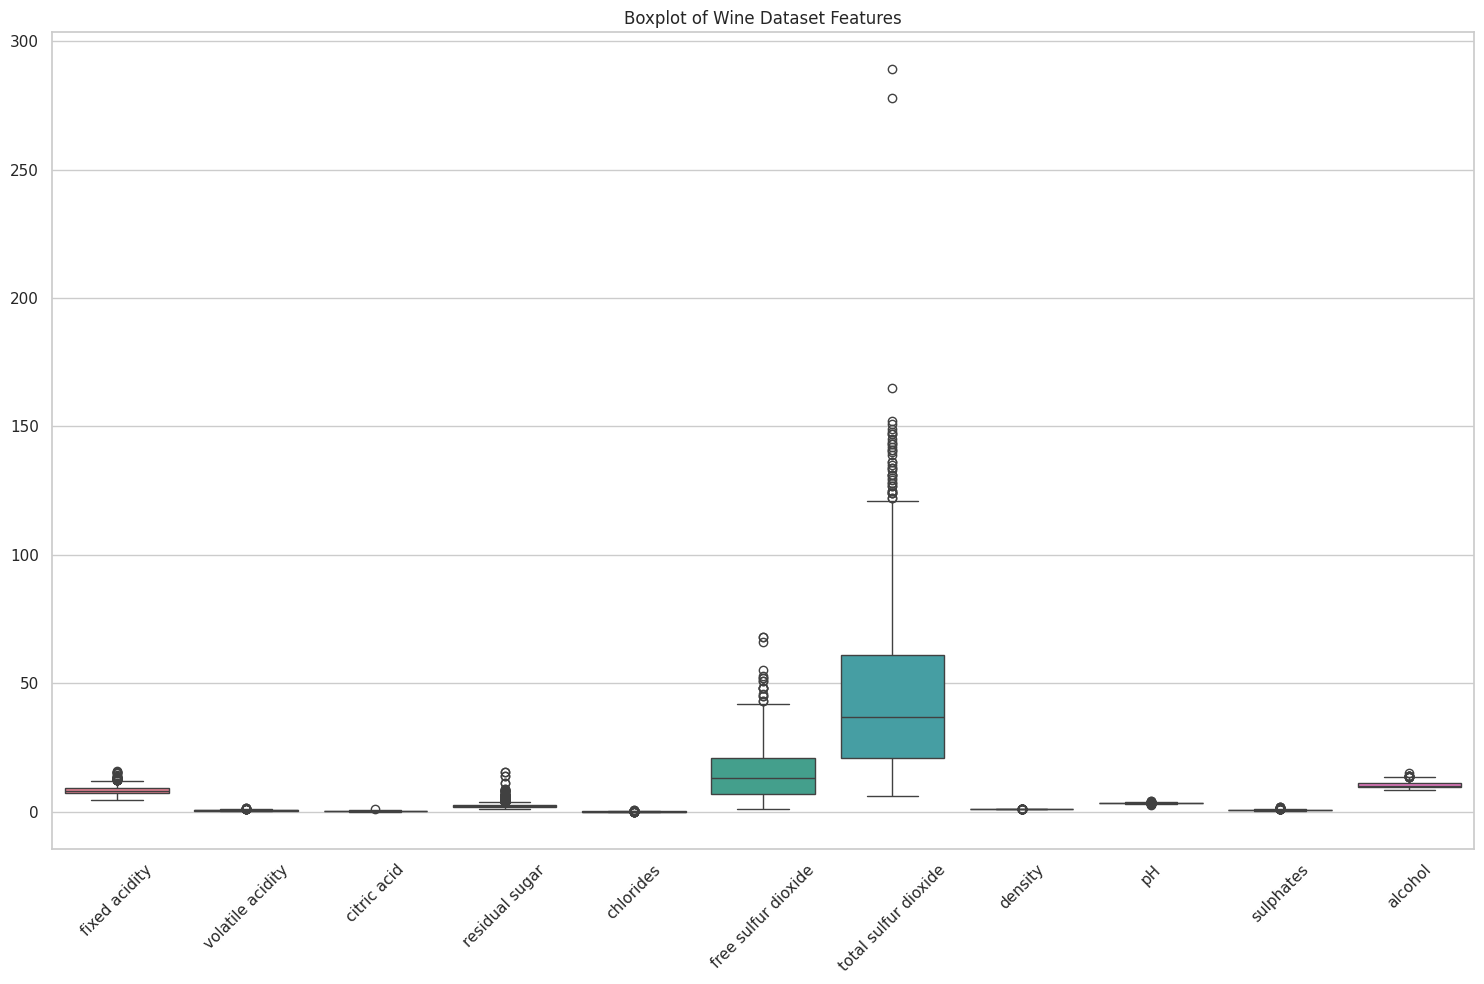

In [74]:
# Box plots are useful for visualizing the distribution of a continuous variable (or feature) across different categories or groups.
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplot of Wine Dataset Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h5> In our dataset we might(as it is obvious in above plots) face with some feature's values that are too big or too small and this difference between these values gonna make situation hard for our classification algorithm, in order to prevent that we use scalers to bring our datas in a logical domain. in this exercise we're gonna use standardScaler</h5>

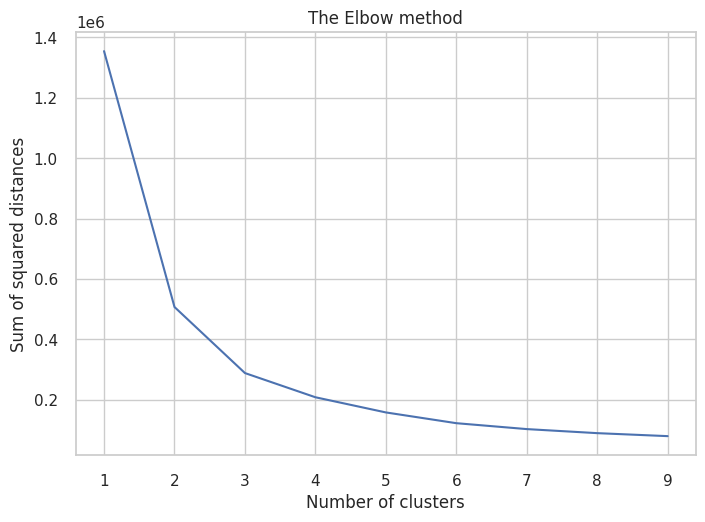

In [94]:
wss=[]#wss: wittin class sum of squared
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df)
  wss.append(kmeans.inertia_)

plt.plot(range(1,10), wss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

as we can see there is no sudden change in sum of squared distance after 3 cluster so we choose 3 total cluster.
if we can't estimate number of cluster from above plot, we can use KElbowVisualizer to extract it automatically like below:

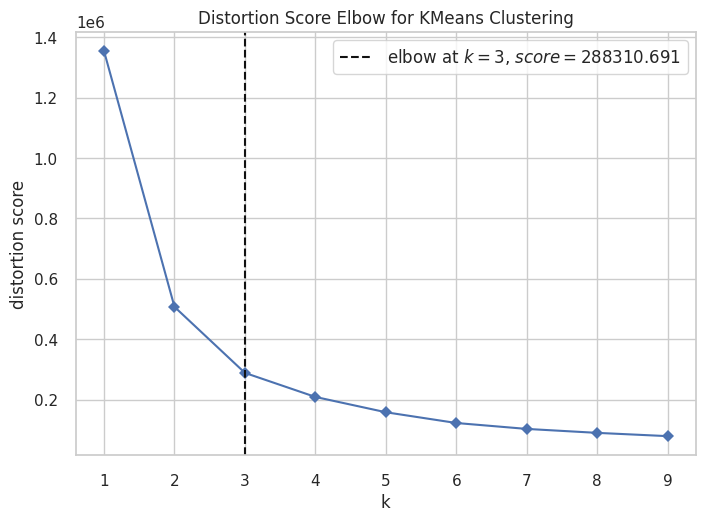

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,10), timings=False)
visualizer.fit(df)
visualizer.show()


For cluster: 2, the silhouette score is: 0.5990729269639459
For cluster: 3, the silhouette score is: 0.526869582882153
For cluster: 4, the silhouette score is: 0.4945950006974259
For cluster: 5, the silhouette score is: 0.48457523966623994
For cluster: 6, the silhouette score is: 0.43659013521320644
For cluster: 7, the silhouette score is: 0.3981382132790897
For cluster: 8, the silhouette score is: 0.3970868141581323
For cluster: 9, the silhouette score is: 0.3885787633521378


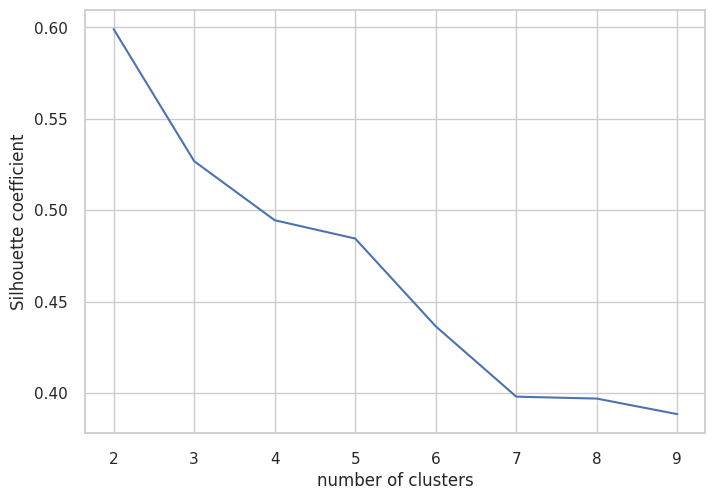

In [99]:
#evaluate with silhouette_score
silhouette_coef = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  print(f'For cluster: {i}, the silhouette score is: {score}')
  silhouette_coef.append(score)

plt.plot(range(2,10), silhouette_coef)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt. show()

we took next best score as our total number of clusters, which is again 3.
no we should train our kmeans with 3 cluster, but first we will transform our datas using PCA

In [103]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [104]:
#implement K-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

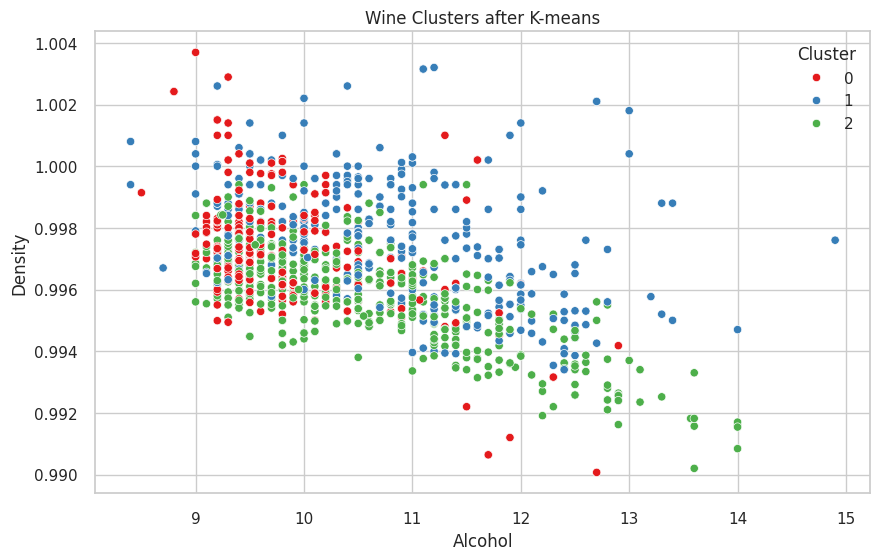

In [107]:
#visualizing clustring using k-means
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='density', hue='Cluster', palette='Set1', legend='full')
plt.title("Wine Clusters after K-means")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [112]:
# Perform hierarchical clustering
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(scaled_features)
df['Cluster'] = clustering.labels_

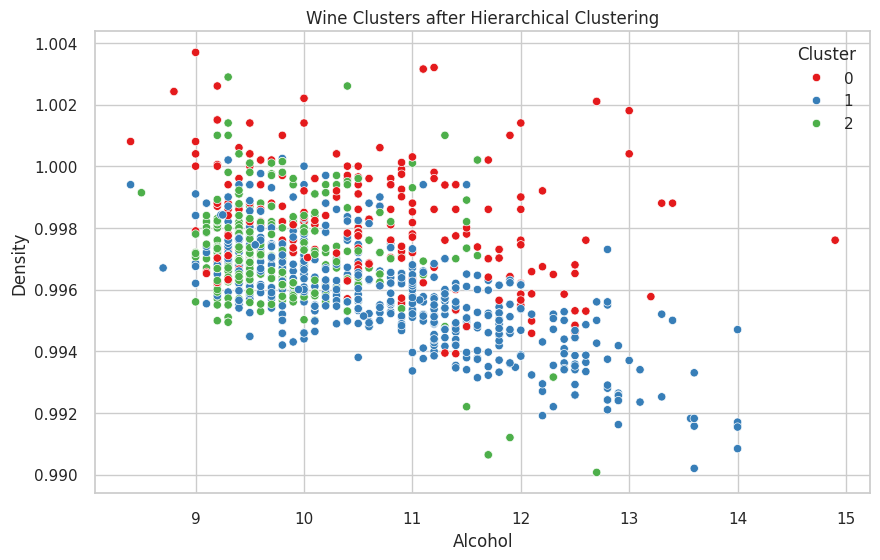

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='density', hue='Cluster', palette='Set1', legend='full')
plt.title("Wine Clusters after Hierarchical Clustering")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()